In [1]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
set_default()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

In [5]:
X

tensor([[ 0.6006,  1.7765],
        [ 0.0333, -0.3665],
        [-1.4542,  0.8711],
        ...,
        [-0.3907, -0.3721],
        [-0.3187,  0.7871],
        [ 1.3106, -0.4210]])

In [6]:
X.size()

torch.Size([1000, 2])

In [7]:
colors

tensor([ 6.0065e-01,  3.3308e-02, -1.4542e+00,  1.5814e+00, -2.8511e-01,
         6.3504e-01,  3.8389e-01, -6.5013e-01,  1.1790e+00, -1.6511e+00,
         3.2436e-01,  2.1101e-01,  6.4294e-01,  4.1317e-03, -5.9648e-01,
        -6.3774e-01,  1.0085e+00,  3.5660e-01,  5.3697e-02,  9.7638e-01,
         4.4124e-01,  3.6252e-01, -1.8314e+00,  1.4975e+00,  8.6948e-01,
        -1.7002e+00,  8.3884e-01, -2.0670e+00,  3.8135e-01, -9.2110e-02,
        -1.3081e+00, -5.6960e-01,  4.6550e-01,  1.6293e-01,  1.8613e+00,
         1.3711e+00,  4.2795e-01,  9.6105e-01, -9.9329e-01,  8.0687e-01,
        -1.2098e-01,  9.3007e-01,  3.0128e-02,  2.8446e-02,  2.2769e-01,
        -1.2230e+00, -3.7905e-02,  3.6058e-01,  1.1576e+00, -5.6557e-01,
        -1.8494e-01,  7.2333e-01, -1.0951e+00,  1.7597e+00, -8.5840e-01,
         1.2895e+00,  6.0744e-01,  6.4067e-01, -2.2333e+00,  1.8566e+00,
        -2.6915e-01,  3.1456e-01, -7.7165e-02,  3.7723e-01, -2.1513e-01,
        -1.5653e+00, -5.0326e-02,  2.6978e+00,  1.4

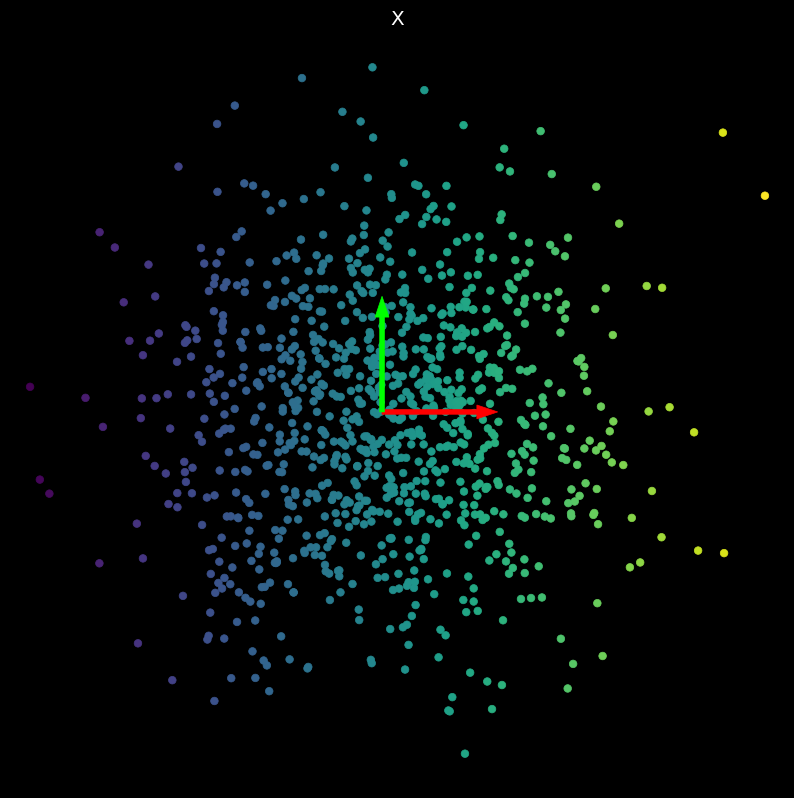

In [8]:
show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

In [9]:
torch.cat((torch.zeros(2, 2), torch.eye(2)))

tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 1.]])

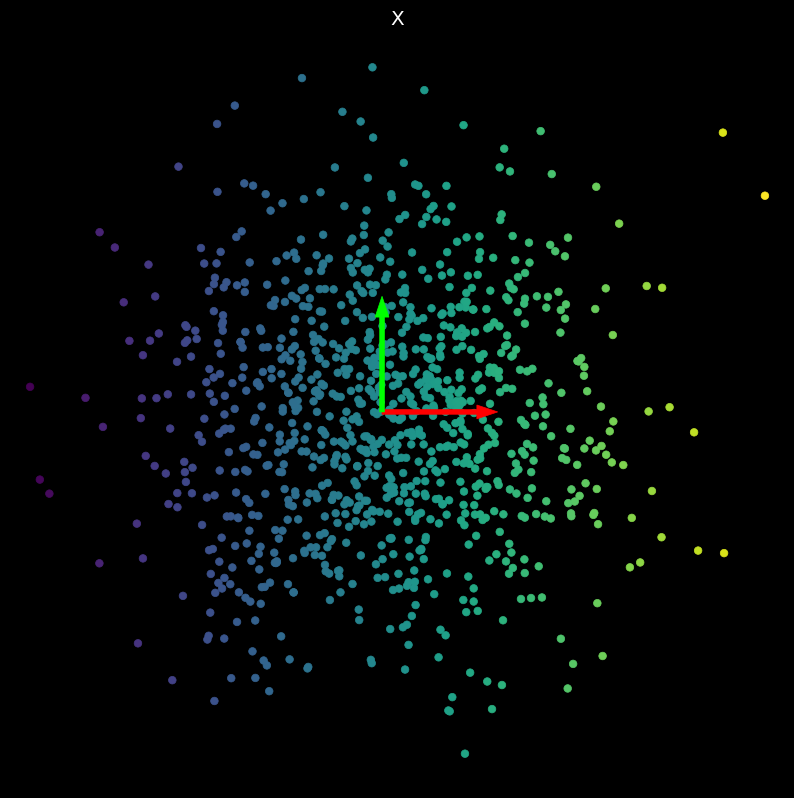

In [10]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

In [11]:
X

tensor([[ 0.6006,  1.7765],
        [ 0.0333, -0.3665],
        [-1.4542,  0.8711],
        ...,
        [-0.3907, -0.3721],
        [-0.3187,  0.7871],
        [ 1.3106, -0.4210]])

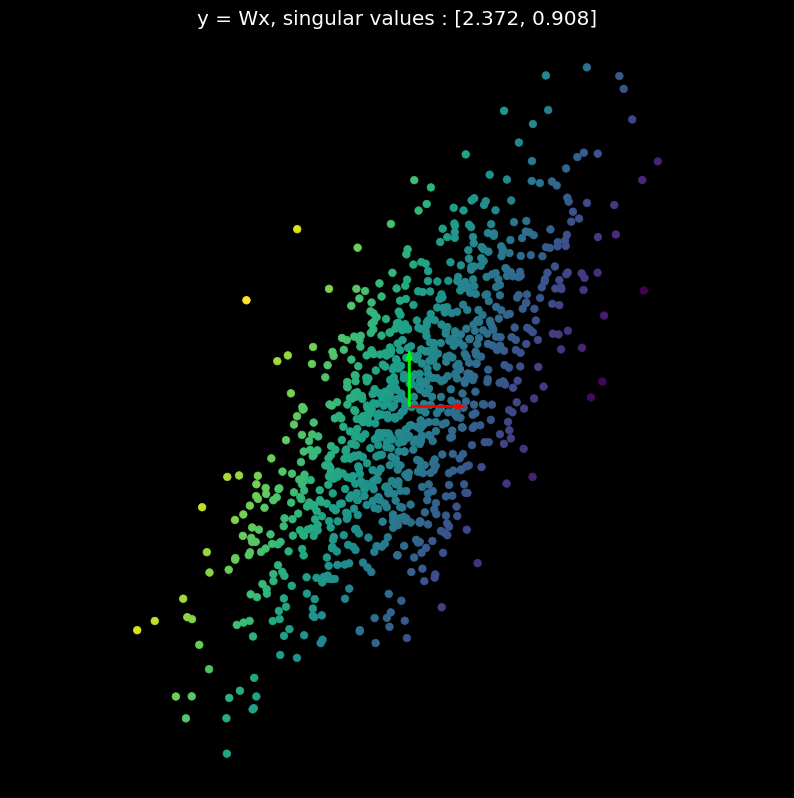

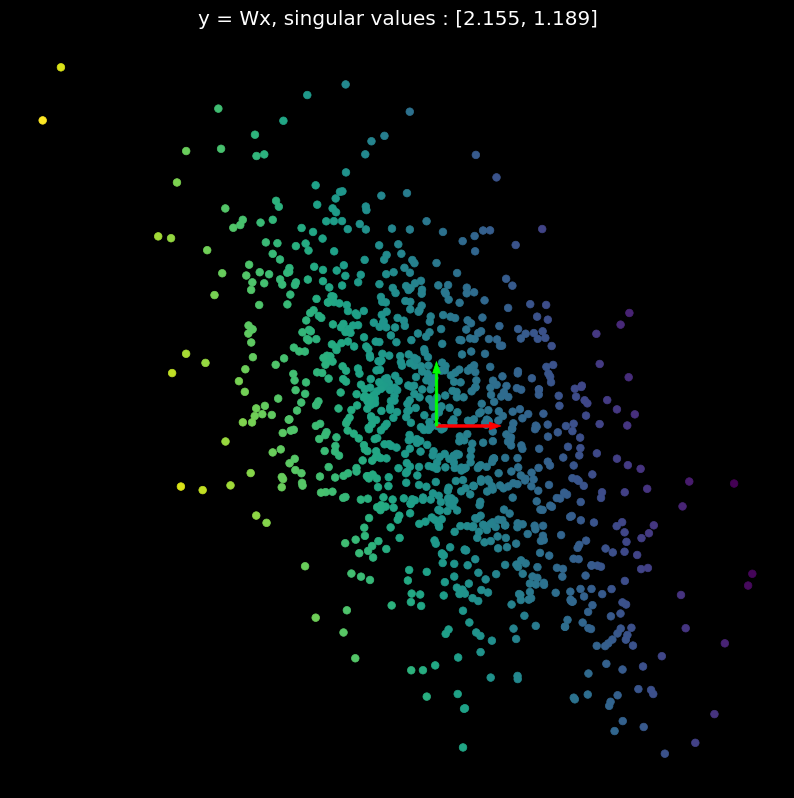

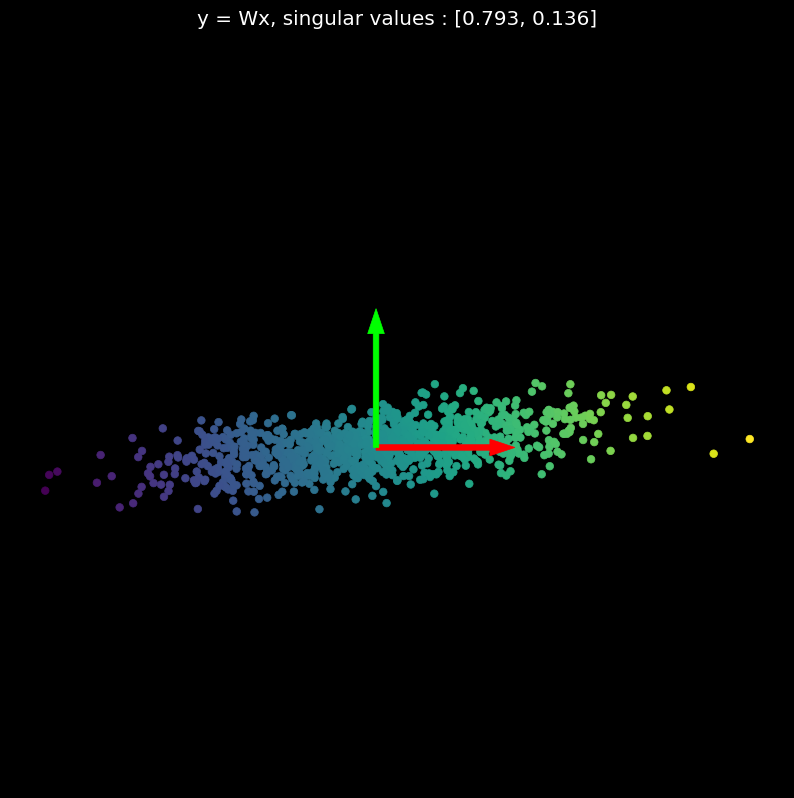

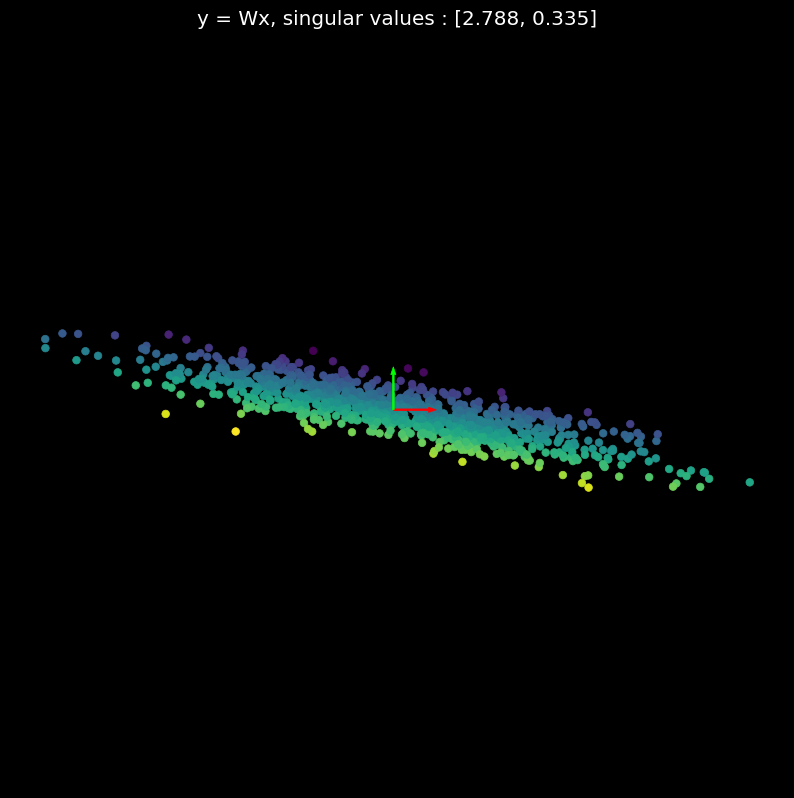

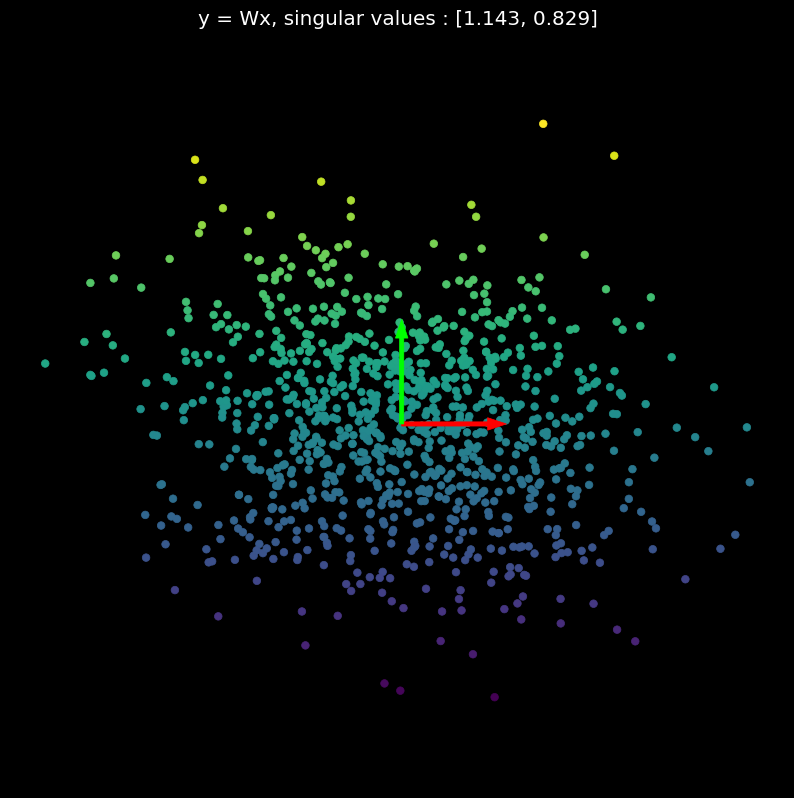

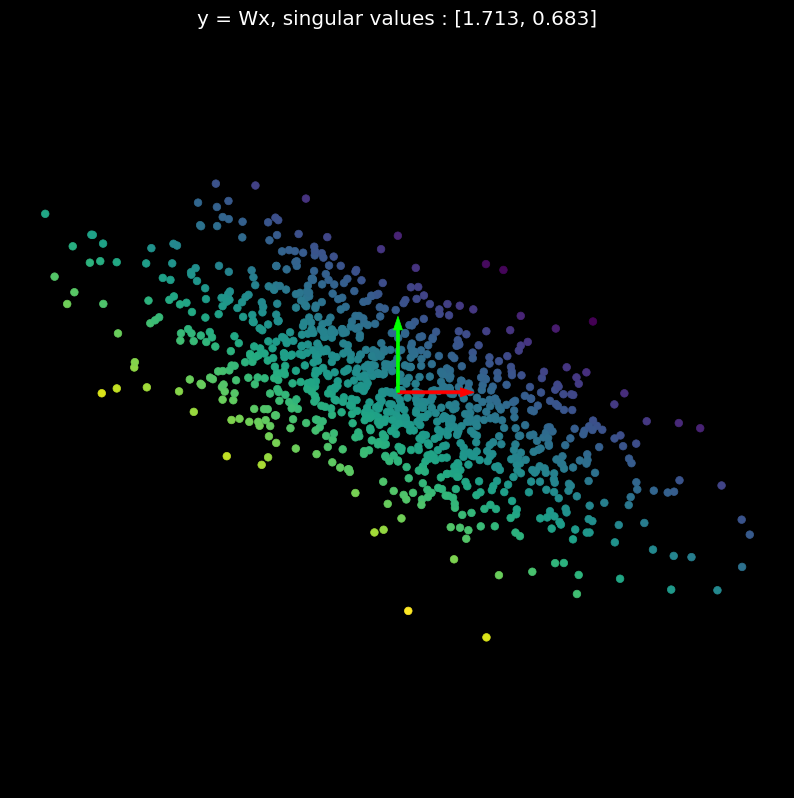

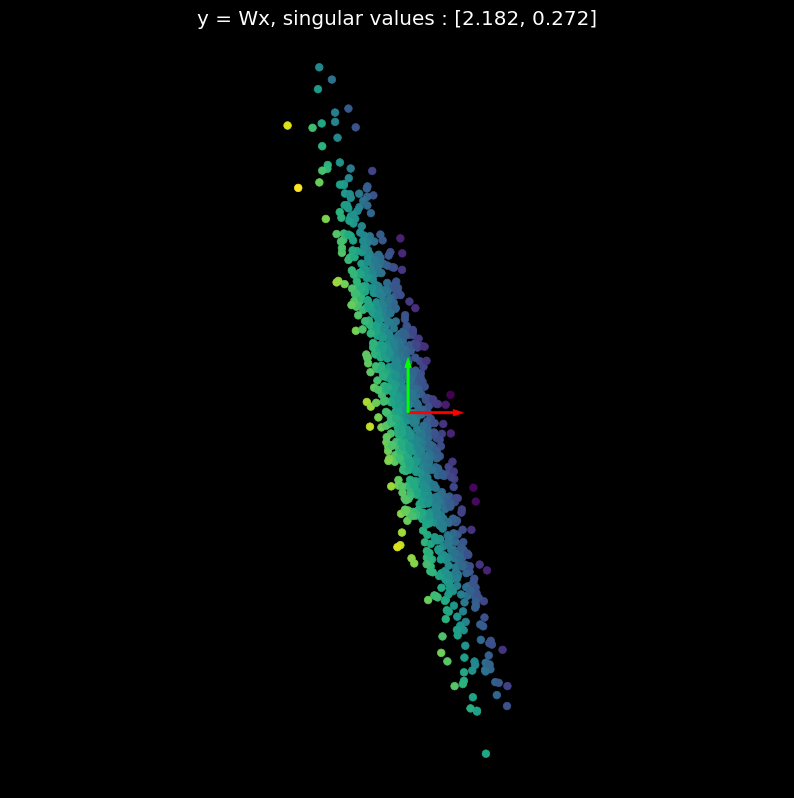

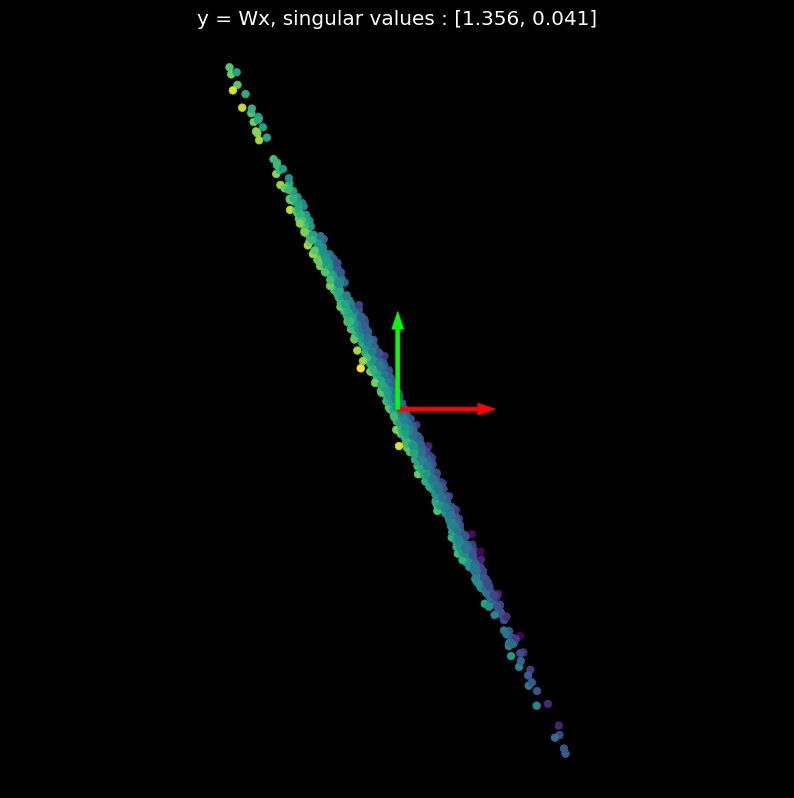

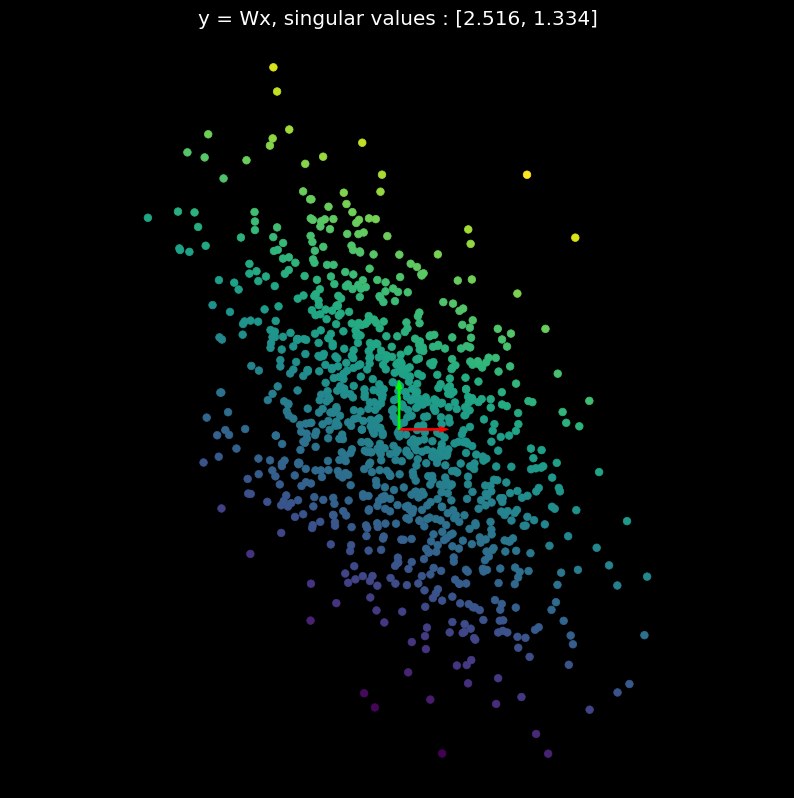

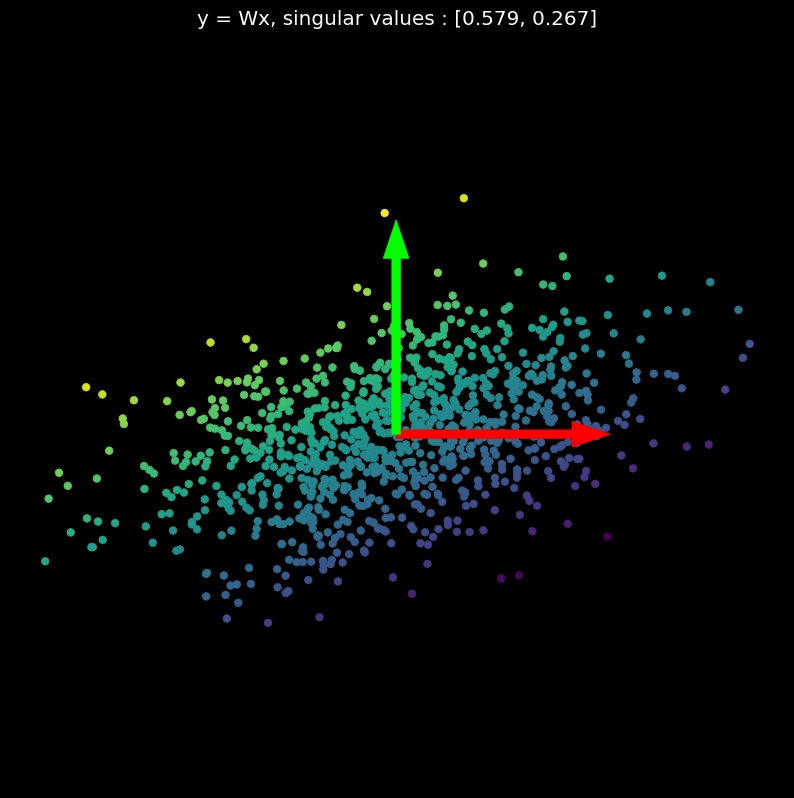

In [12]:
for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)

In [13]:
X

tensor([[ 0.6006,  1.7765],
        [ 0.0333, -0.3665],
        [-1.4542,  0.8711],
        ...,
        [-0.3907, -0.3721],
        [-0.3187,  0.7871],
        [ 1.3106, -0.4210]])

In [14]:
W

tensor([[-0.2892,  0.4836],
        [ 0.1744,  0.2428]])

In [15]:
W.t()

tensor([[-0.2892,  0.1744],
        [ 0.4836,  0.2428]])

In [16]:
X @ W.t()

tensor([[ 0.6854,  0.5361],
        [-0.1869, -0.0832],
        [ 0.8418, -0.0420],
        ...,
        [-0.0669, -0.1585],
        [ 0.4728,  0.1356],
        [-0.5826,  0.1263]])

In [17]:
Y.size()

torch.Size([1000, 2])

In [19]:
X.size()
W.t().size()

torch.Size([2, 2])

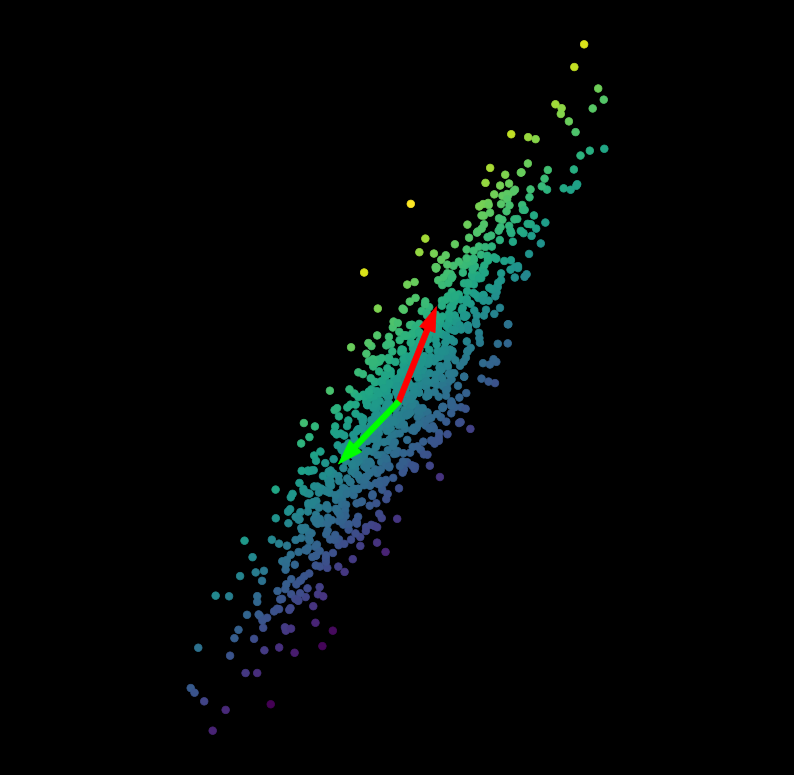

In [20]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

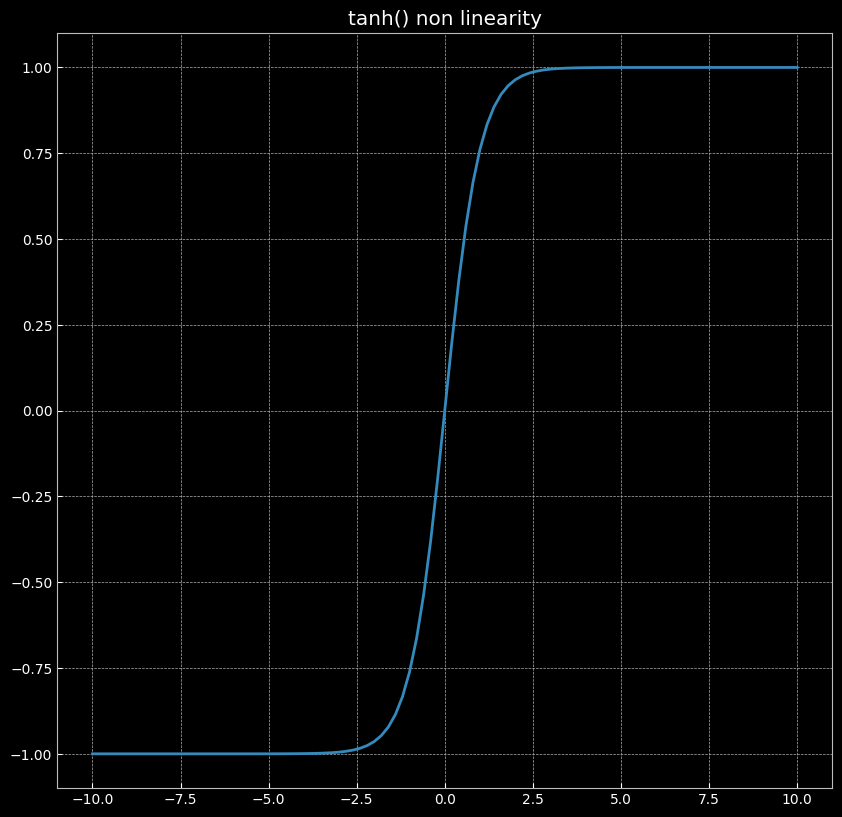

In [21]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

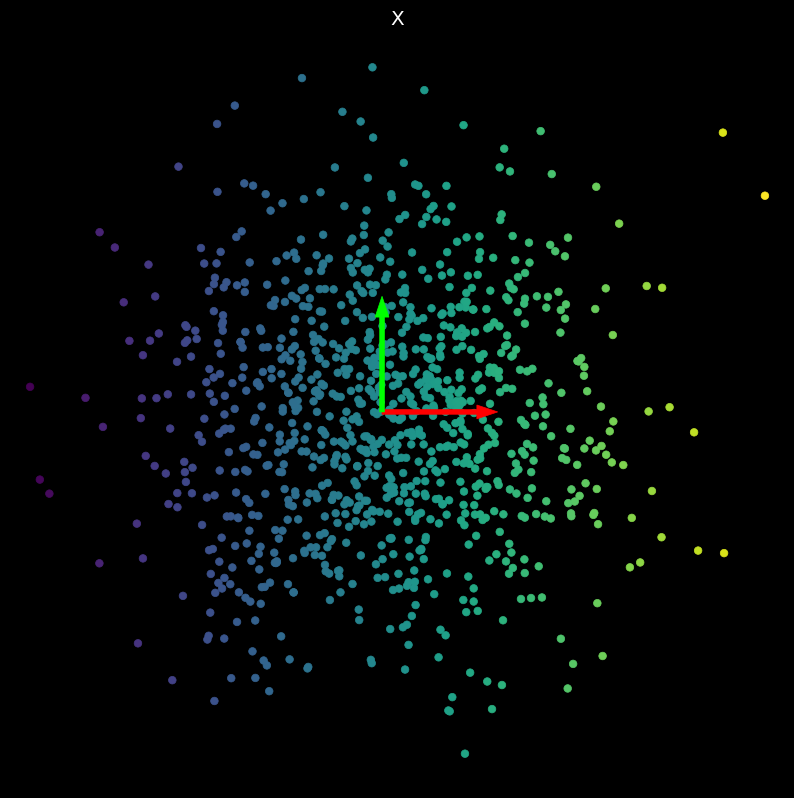

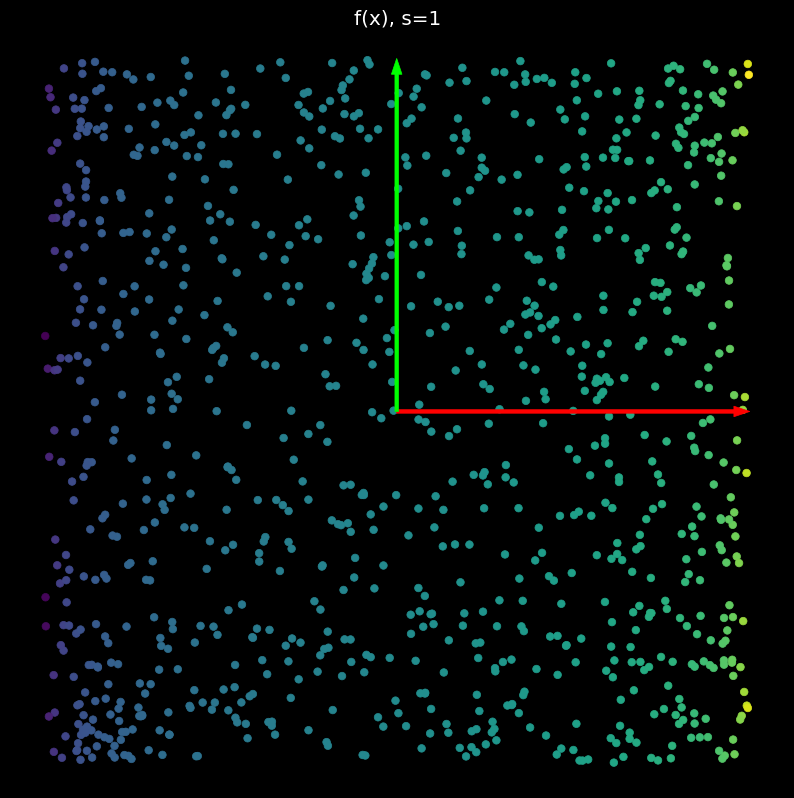

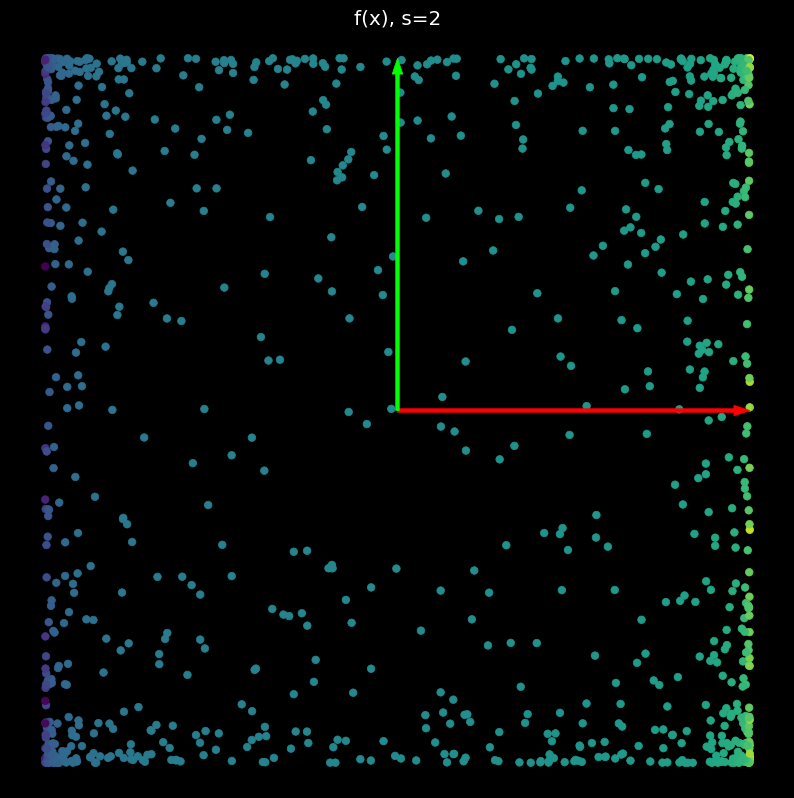

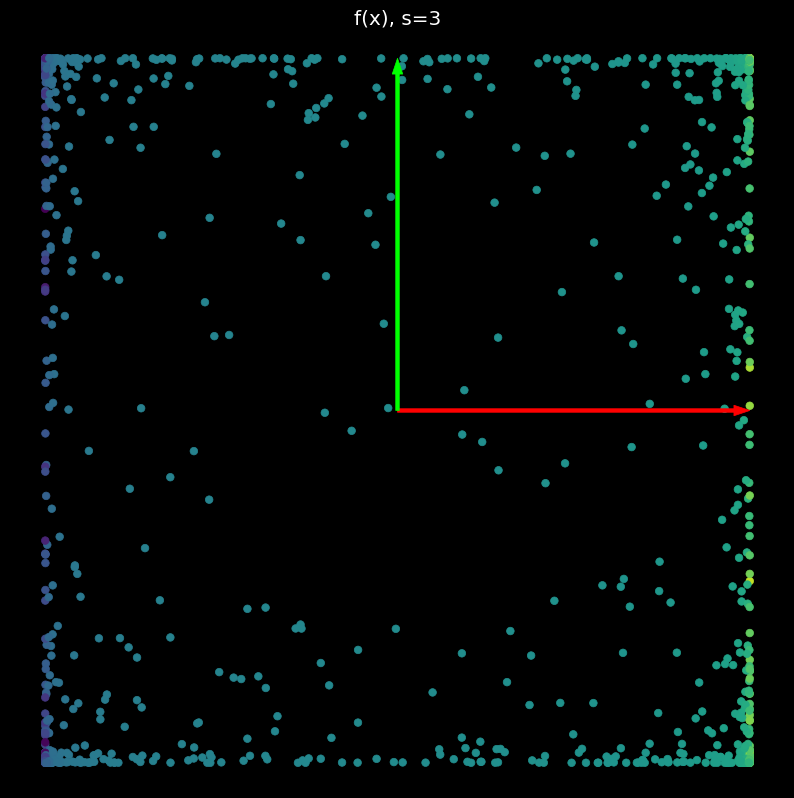

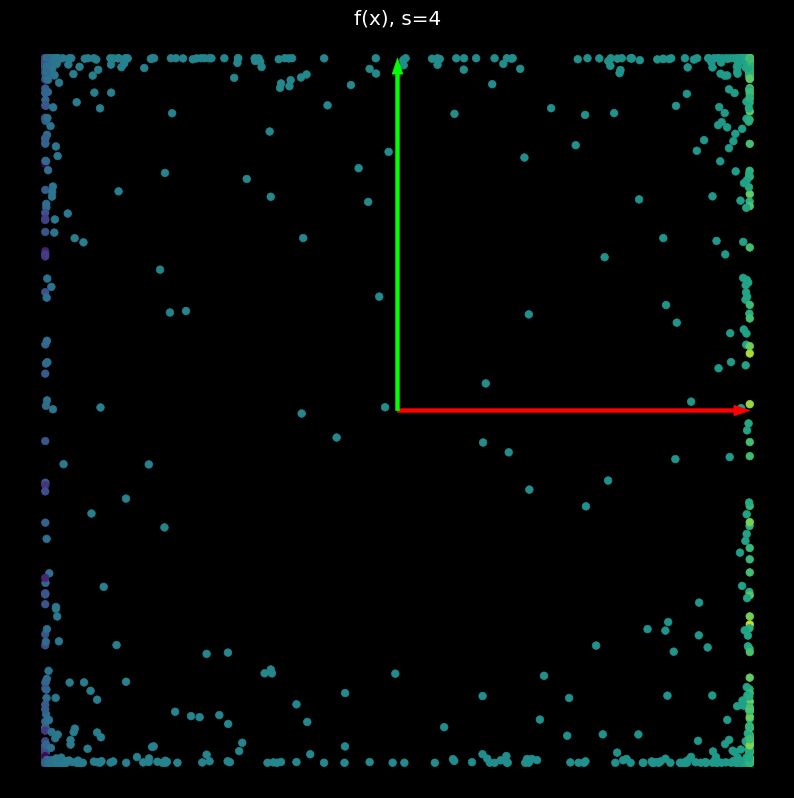

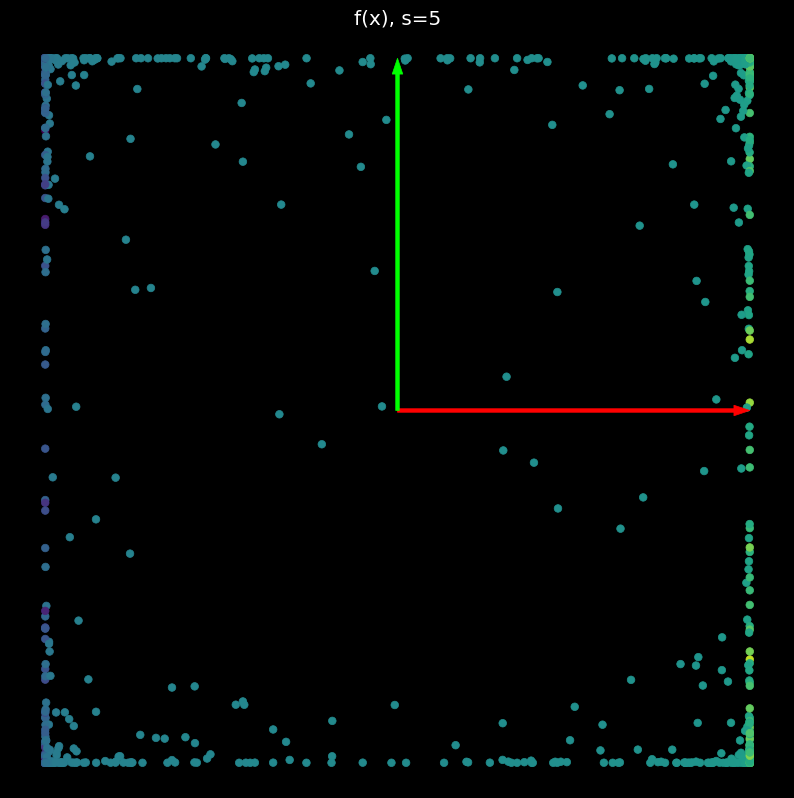

In [22]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

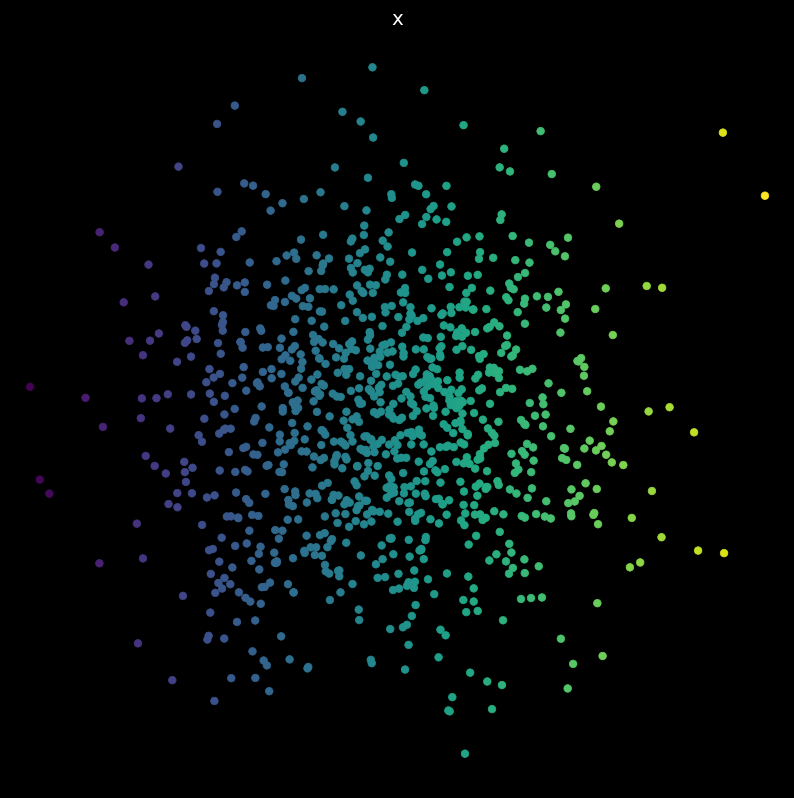

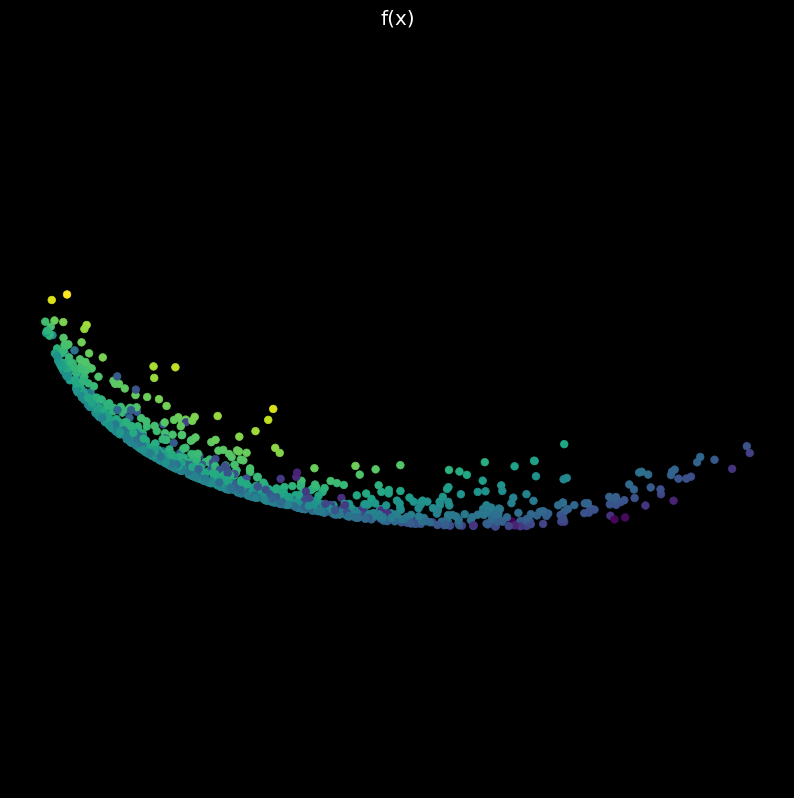

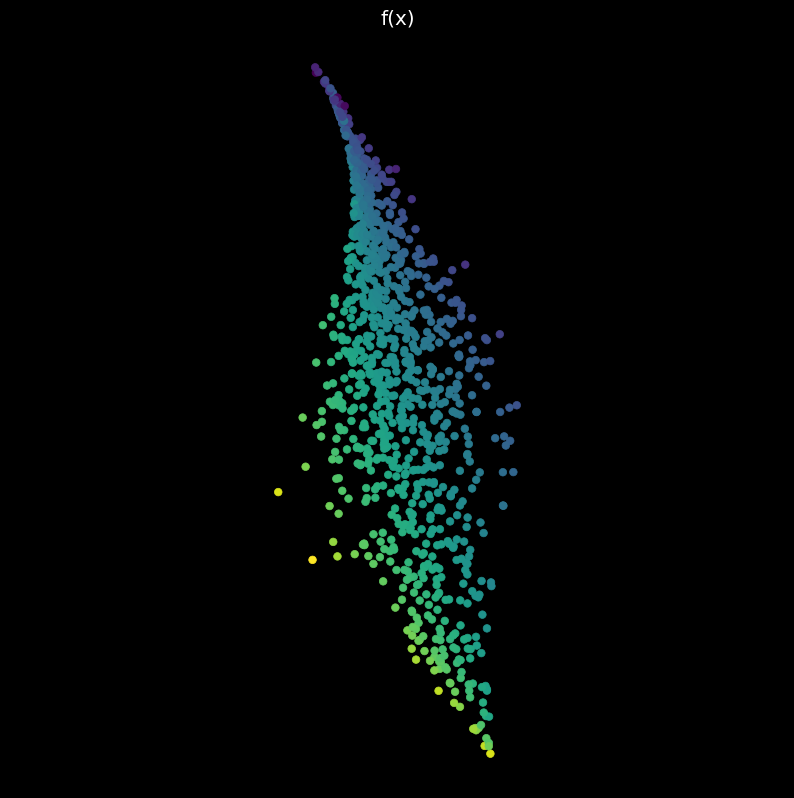

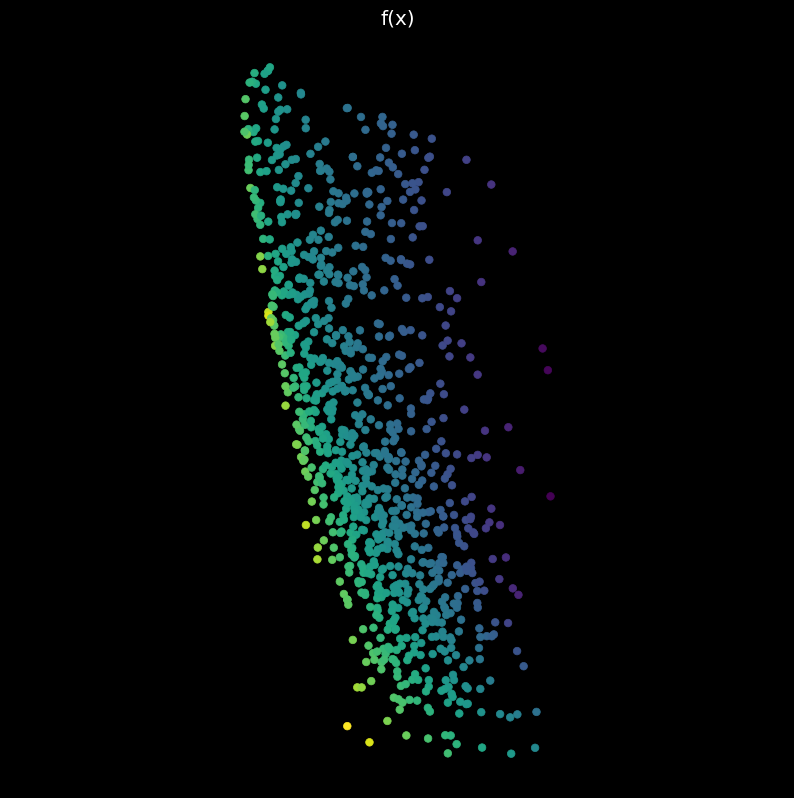

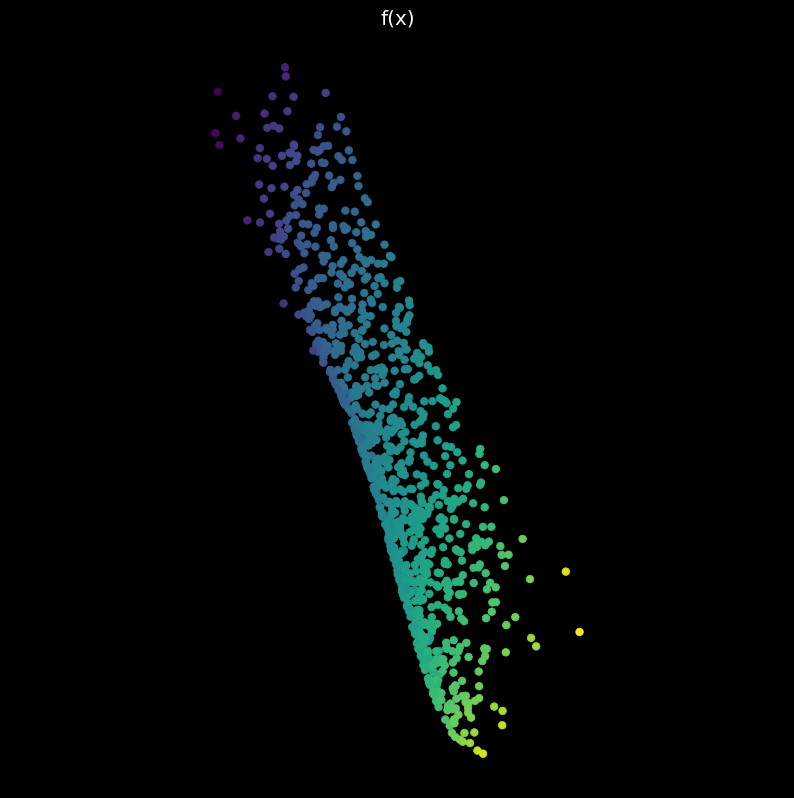

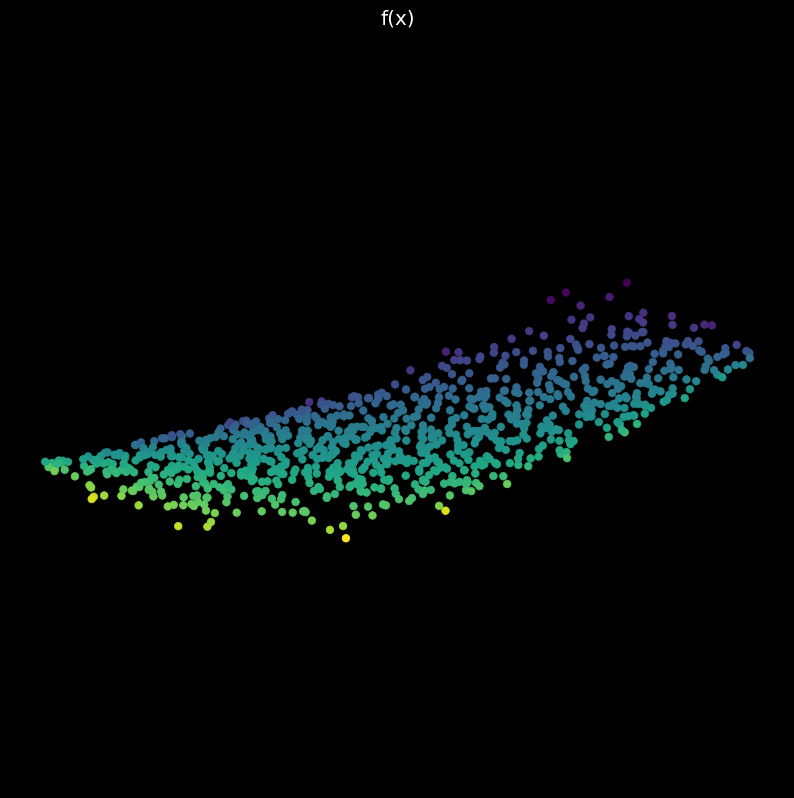

In [23]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')

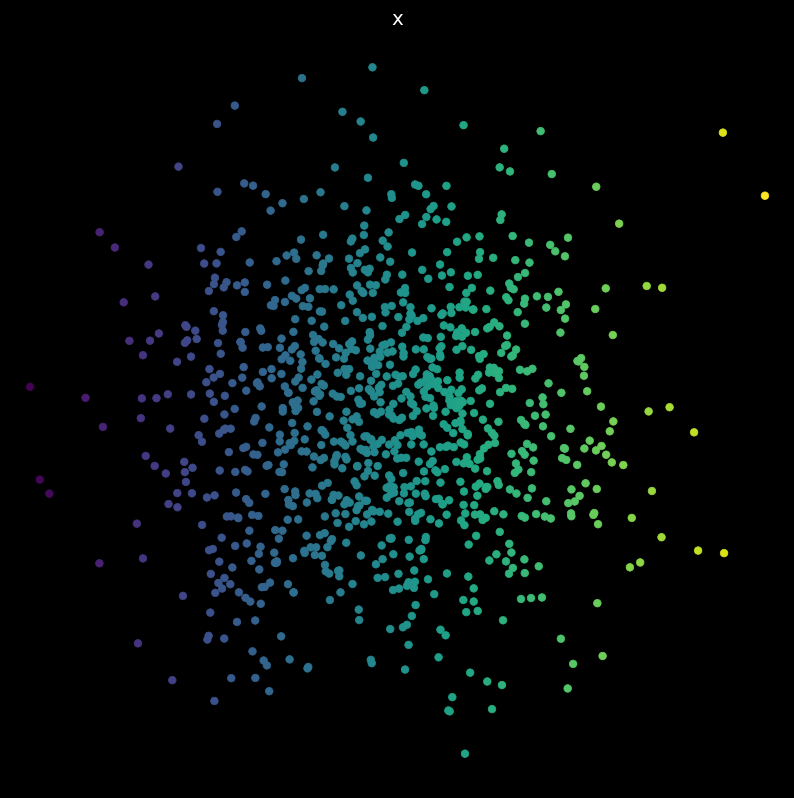

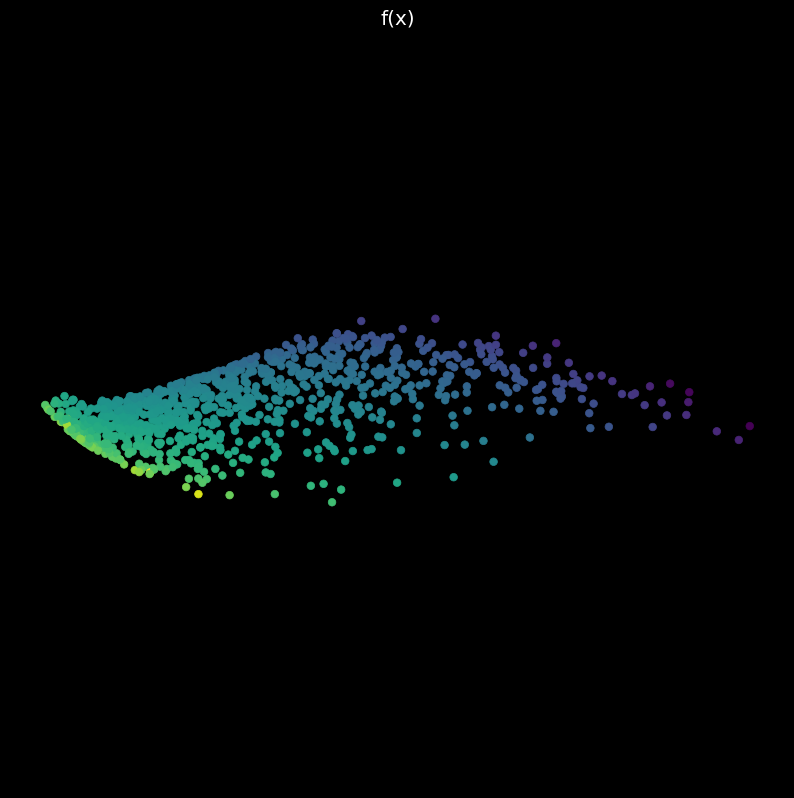

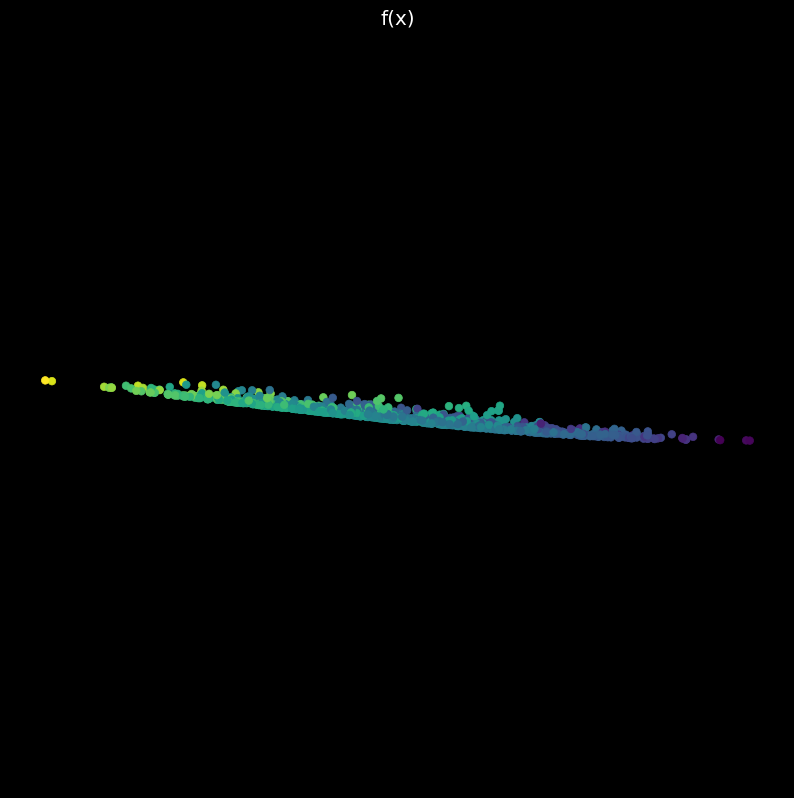

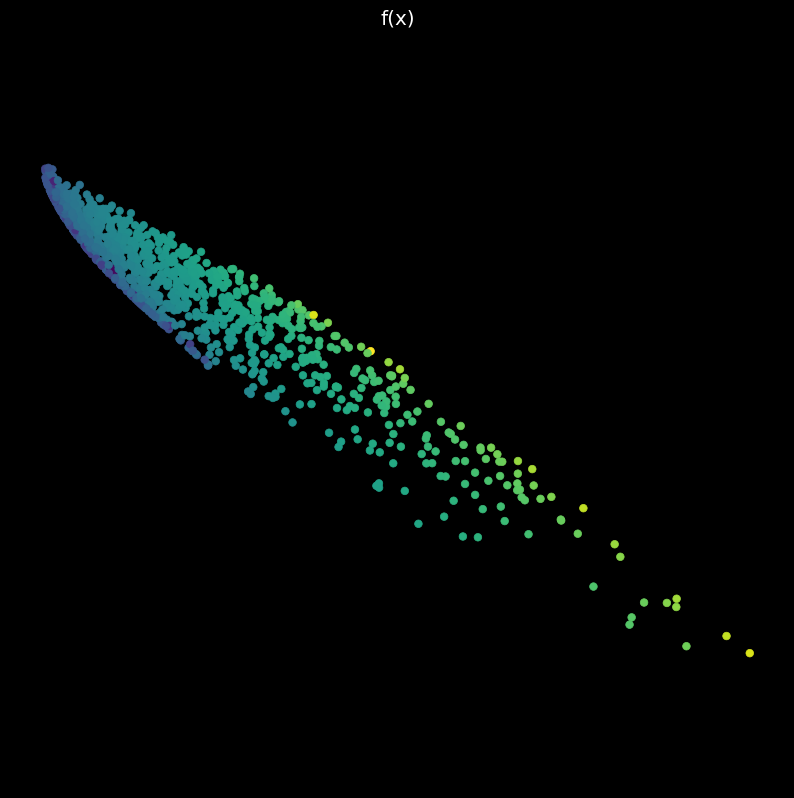

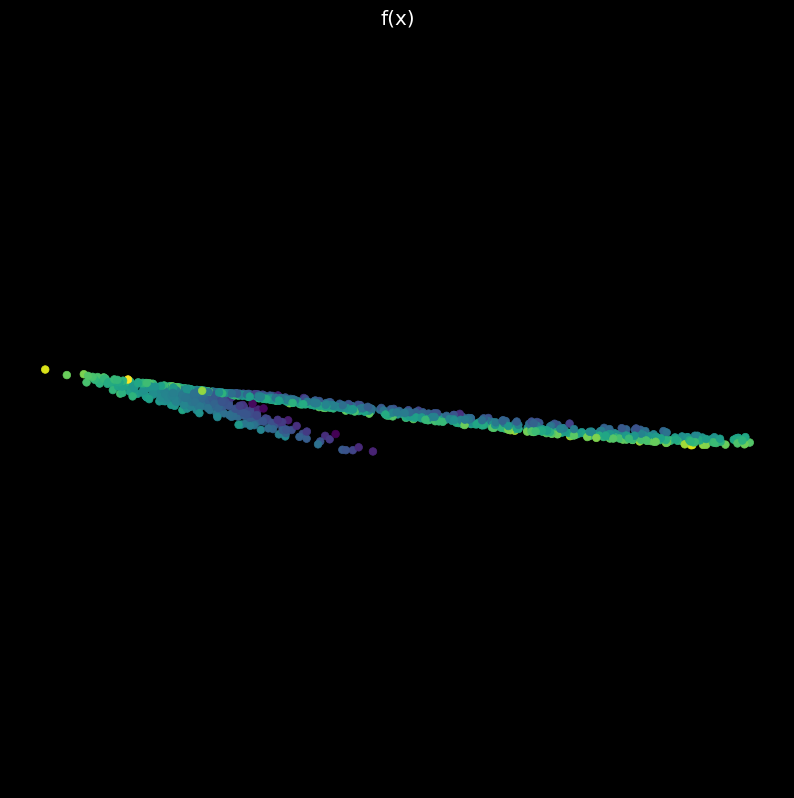

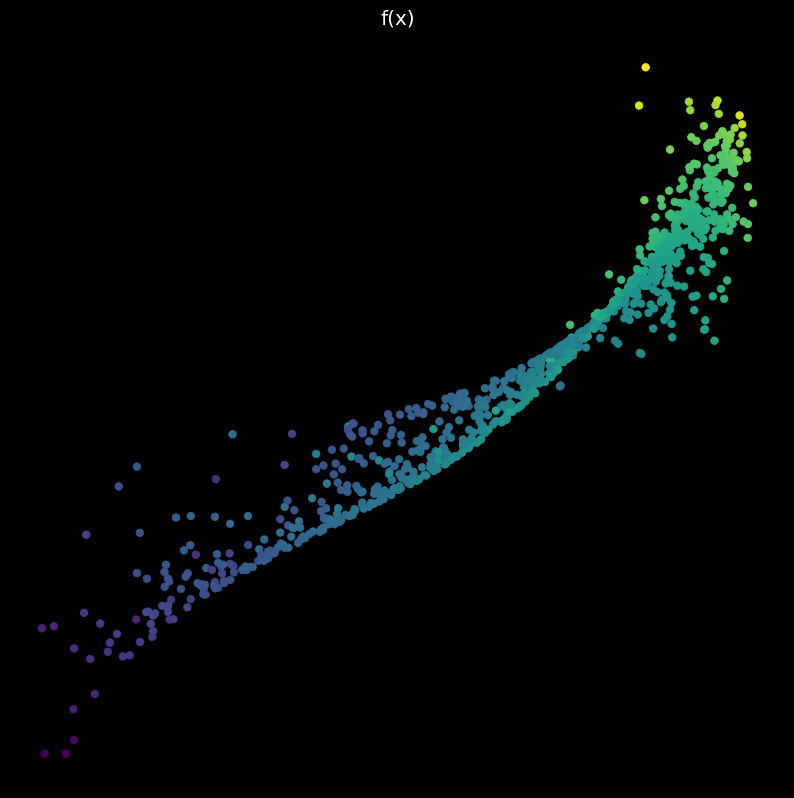

In [24]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')